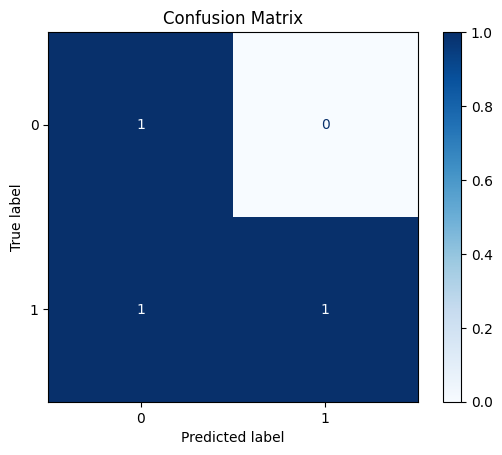

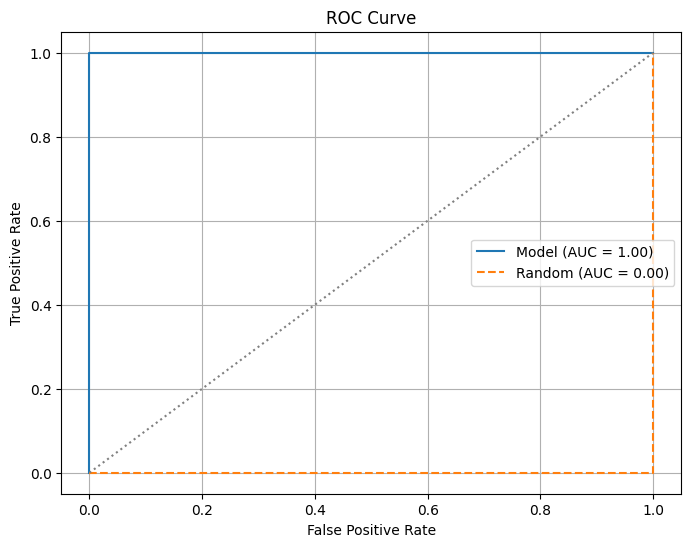


Manual Calculations:
TP: 1
TN: 1
FP: 0
FN: 1
Accuracy: 0.6667
Precision: 1.0000
Recall (Sensitivity): 0.5000
Specificity: 1.0000
NPV: 0.5000
F1-Score: 0.6667
MCC: 0.5000

Sklearn Metrics:
Accuracy: 0.6667
Precision: 1.0000
Recall: 0.5000
F1-Score: 0.6667
MCC: 0.5000

AUC (Model): 1.0000
AUC (Random): 0.0000


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score, f1_score, matthews_corrcoef

# Load dataset
##data = load_breast_cancer()
##X = data.data
##y = data.target

data = {
    'age': [45, 50, 30, 35, 60, 25, 55, 40],
    'blood_pressure': [130, 140, 120, 110, 150, 115, 145, 125],
    'cholesterol': [200, 220, 180, 190, 230, 170, 210, 185],
    'diabetes': [1, 1, 0, 0, 1, 0, 1, 0]  # target
}

df = pd.DataFrame(data)
#df = pd.read_csv("own_data.csv")

# 2. Define features and target
X = df.drop(columns=['diabetes'])
y = df['diabetes']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# -------------------------
# Manual Metrics Calculation
# -------------------------
def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    mcc_num = (tp * tn - fp * fn)
    mcc_den = np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))
    mcc = mcc_num / mcc_den if mcc_den > 0 else 0

    return {
        'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall (Sensitivity)': recall,
        'Specificity': specificity,
        'NPV': npv,
        'F1-Score': f1,
        'MCC': mcc
    }

manual_metrics = calculate_metrics(y_test, y_pred)

# -------------------------
# Sklearn Metrics
# -------------------------
sklearn_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred),
    'MCC': matthews_corrcoef(y_test, y_pred)
}

# Confusion Matrix
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# ROC & AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Random probabilities
random_probs = np.random.rand(len(y_test))
fpr_rand, tpr_rand, _ = roc_curve(y_test, random_probs)
auc_rand = roc_auc_score(y_test, random_probs)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Model (AUC = {auc_score:.2f})')
plt.plot(fpr_rand, tpr_rand, linestyle='--', label=f'Random (AUC = {auc_rand:.2f})')
plt.plot([0, 1], [0, 1], linestyle=':', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# -------------------------
# Print Results
# -------------------------
print("\nManual Calculations:")
for k, v in manual_metrics.items():
    print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")

print("\nSklearn Metrics:")
for k, v in sklearn_metrics.items():
    print(f"{k}: {v:.4f}")

print(f"\nAUC (Model): {auc_score:.4f}")
print(f"AUC (Random): {auc_rand:.4f}")